# Il ruolo delle donne nel cinema: un viaggio nel tempo 

Il cinema è stato, fin dalla sua nascita, uno specchio della società, riflettendo (e talvolta influenzando) il ruolo della donna nella cultura di ogni epoca. In questo viaggio attraverso i dati, esploreremo come la presenza femminile si sia evoluta nel tempo, analizzando diversi aspetti come la loro rappresentazione nei generi cinematografici, il riconoscimento ottenuto attraverso premi e la percezione del pubblico e della critica.

In [3]:
!pip install gender-guesser


   ---------------------------------------- 0.0/379.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/379.3 kB ? eta -:--:--
   --- ----------------------------------- 30.7/379.3 kB 435.7 kB/s eta 0:00:01
   ------- ------------------------------- 71.7/379.3 kB 653.6 kB/s eta 0:00:01
   --------------------- ------------------ 204.8/379.3 kB 1.2 MB/s eta 0:00:01
   -------------------------------- ------- 307.2/379.3 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 379.3/379.3 kB 1.6 MB/s eta 0:00:00


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gender_guesser.detector as gender


# Ottiene la directory di lavoro corrente
script_dir = os.getcwd()

# Cartella dove si trovano i file CSV (modifica con il percorso corretto)
clean_path = os.path.join(script_dir, "Data", "clean_data")

# Caricamento dei dataset con percorsi dinamici
actors = pd.read_csv(os.path.join(clean_path, "actors_cleaned.csv"))
countries = pd.read_csv(os.path.join(clean_path, "countries_cleaned.csv"))
crew = pd.read_csv(os.path.join(clean_path, "crew_cleaned.csv"))
genres = pd.read_csv(os.path.join(clean_path, "genres_cleaned.csv"))
languages = pd.read_csv(os.path.join(clean_path, "languages_cleaned.csv"))
movies = pd.read_csv(os.path.join(clean_path, "movies_cleaned.csv"))
posters = pd.read_csv(os.path.join(clean_path, "posters_cleaned.csv"))
releases = pd.read_csv(os.path.join(clean_path, "releases_cleaned.csv"))
studios = pd.read_csv(os.path.join(clean_path, "studios_cleaned.csv"))
themes = pd.read_csv(os.path.join(clean_path, "themes_cleaned.csv"))
oscar_awards = pd.read_csv(os.path.join(clean_path, "the_oscar_awards_cleaned.csv"))
rotten_tomatoes = pd.read_csv(os.path.join(clean_path, "rotten_tomatoes_reviews_cleaned.csv"))


### 1. La presenza delle donne nei film

All’inizio del XX secolo, i ruoli femminili erano spesso relegati a figure stereotipate: la damigella in pericolo, la moglie devota o la femme fatale. Ma nel tempo, questa rappresentazione è cambiata.

Grafico 1: Percentuale di ruoli femminili nei film dal 1920 a oggi.



In [33]:
import gender_guesser.detector as gender

def is_female(name):
    if isinstance(name, str):  # Verifica che 'name' sia una stringa
        return detector.get_gender(name.split()[0]) in ["female", "mostly_female"]
    else:
        return False  # Se non è una stringa, ritorna False (oppure puoi decidere di ignorarlo)
    
    
female_directors = crew[(crew["role"] == "director") & (crew["name"].apply(is_female))]



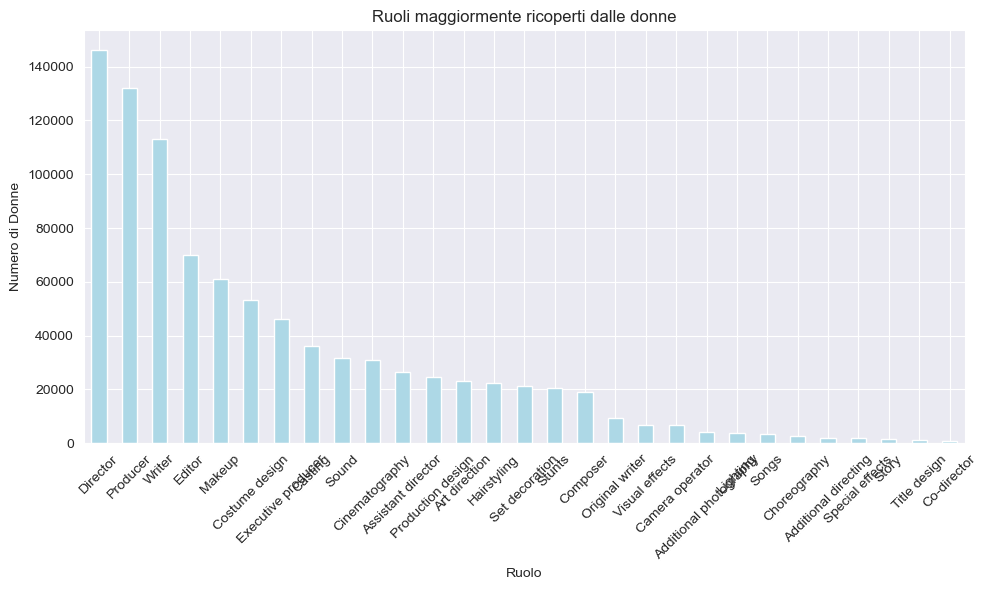

In [16]:
# Creiamo un grafico a barre per la presenza delle donne nei ruoli
female_roles = crew[crew["name"].apply(is_female)]["role"].value_counts()

plt.figure(figsize=(10,6))
female_roles.plot(kind="bar", color='lightblue')
plt.title("Ruoli maggiormente ricoperti dalle donne")
plt.xlabel("Ruolo")
plt.ylabel("Numero di Donne")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



NaT NaT
0


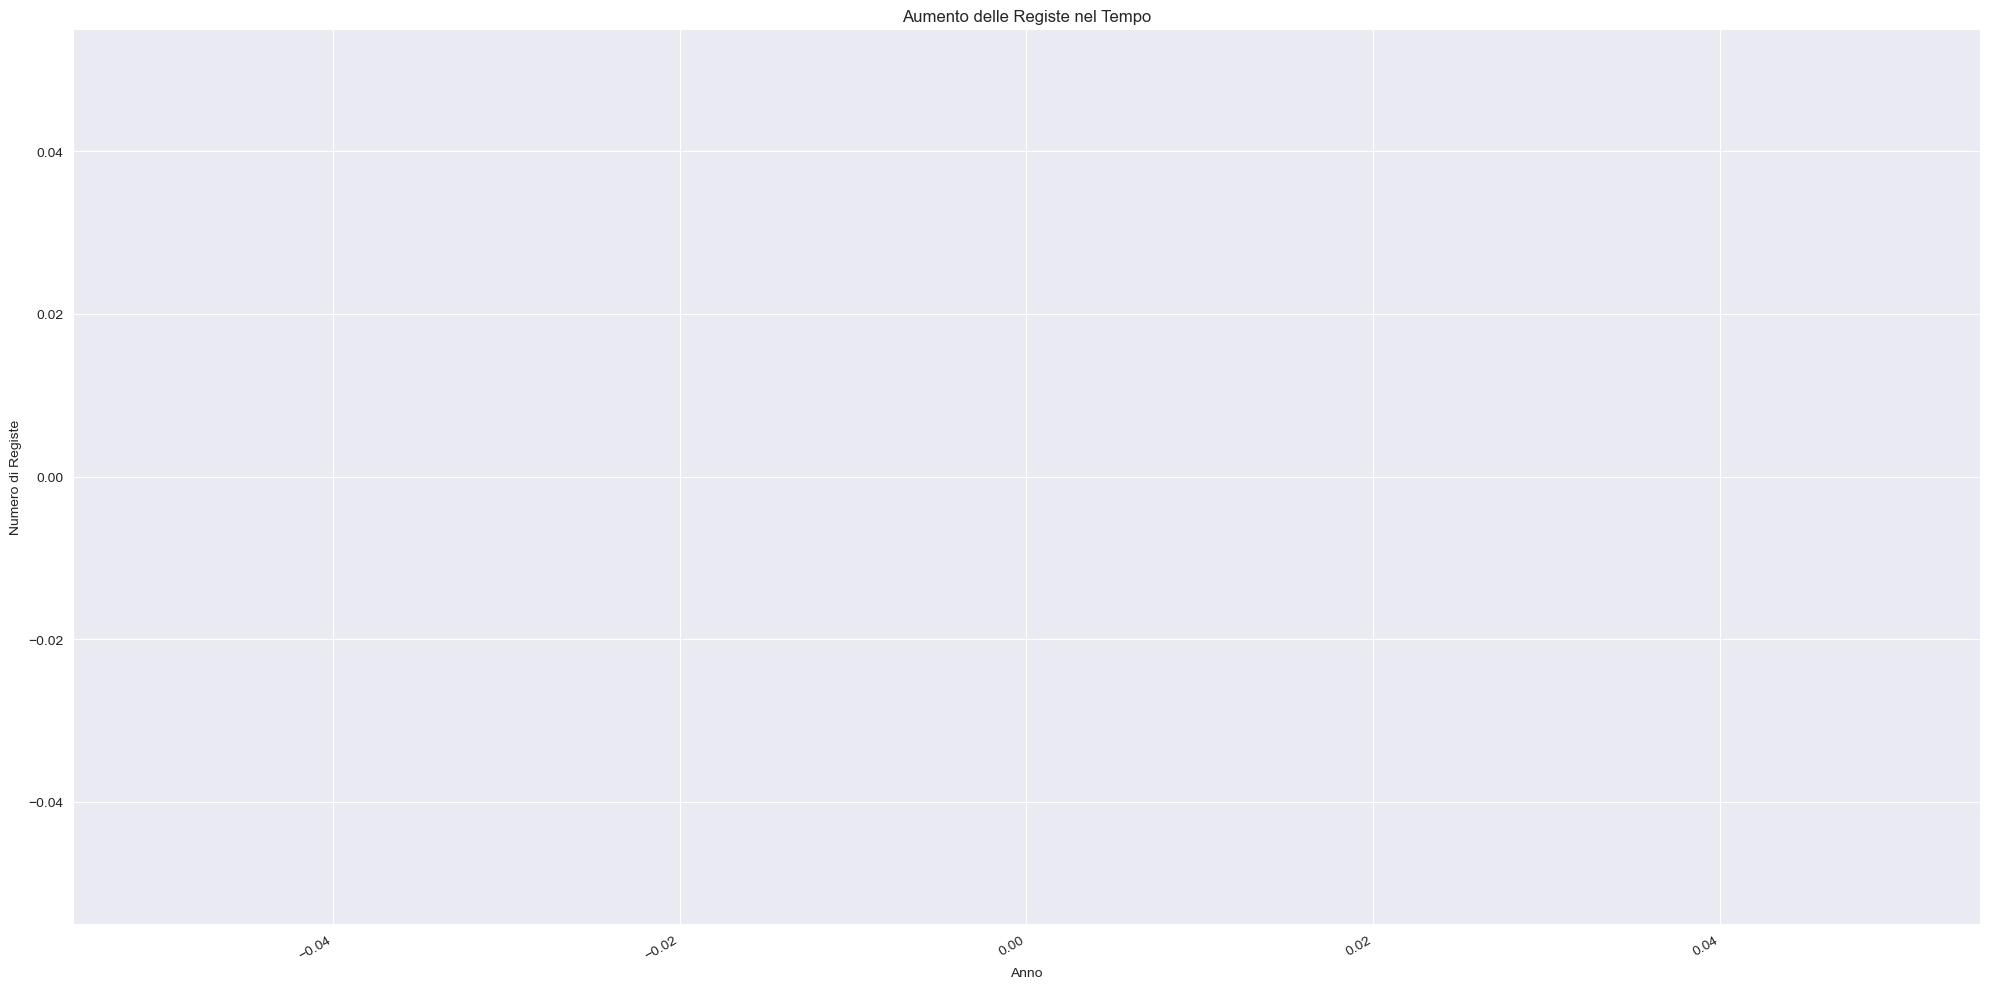

In [36]:
# Assicurati che la colonna 'date' sia in formato datetime (se non lo è già)
movies['date'] = pd.to_datetime(movies['date'], errors='coerce')


# Filtriamo per le registe femmine
female_directors = crew[(crew["role"] == "director") & (crew["name"].apply(is_female))]

# Uniamo il dataframe delle registe con i film per ottenere gli anni
female_directors_with_year = female_directors.merge(movies[['id', 'date']], on='id', how='left')

# Rimuoviamo righe con valori nulli nell'anno dopo la merge
female_directors_with_year = female_directors_with_year.dropna(subset=['date'])

# Raggruppiamo per anno e contiamo il numero di registe per ogni anno
female_directors_by_year = female_directors_with_year.groupby("date")["name"].nunique()

# Verifica il range degli anni
print(female_directors_with_year['date'].min(), female_directors_with_year['date'].max())

# Verifica quanti valori mancanti ci sono nella colonna 'year'
print(female_directors_with_year['date'].isnull().sum())


# Creiamo un grafico a linee per il numero di registe nel tempo
plt.figure(figsize=(20, 10))
female_directors_by_year.plot(kind="line", marker='o', color='pink')
plt.title("Aumento delle Registe nel Tempo")
plt.xlabel("Anno")
plt.ylabel("Numero di Registe")
plt.grid(True)
plt.tight_layout()
plt.show()


